#607 Project: Predicting Bike Sharing Demand

Group Members: 

*   Devanshi Patel​​(30186470)
*   Deyvis Dalman(30166177)
*   Jannatul Naeema(30198919)
*   Faraz Khan​(30146190)
*   Utsav Agrawal(30198220)

# Introduction
Bike sharing programs provide an affordable shared transportation service where bicycles are available for use by individuals for short-distance trips in urban areas, as an alternative to private vehicles. These programs operate similarly to public transit systems, with multiple bike check-out stations catering to both tourists and locals. The aim is to reduce traffic, noise, and air pollution in cities. Bike-share systems offer a sustainable solution for individuals who may have concerns about theft, vandalism, parking, storage, or maintenance of their own bicycles. There are currently over 500 bike-sharing programs worldwide, consisting of more than 500,000 bicycles. These systems generate large amounts of data, making them attractive for research in traffic, environmental, and health issues. The duration of travel, departure and arrival positions are explicitly recorded in these systems, creating a virtual sensor network that can be used to sense mobility in cities. This feature transforms bike sharing systems into virtual sensor networks that can be used to monitor mobility in the city. 

# Dataset

The original dataset is hosted at UCI machine learning repository, contains both daily and hourly count of rental bike data.​

The dataset for this project was collected from Kaggle, it is featured in a competition for predict use of a city bikeshare system.​ The dataset was provided by the Capital Bikeshare program in Washington D.C​. This contains the hourly count of rental bikes between years 2011 and 2012 with the corresponding weather and seasonal information. ​It features ~17,000 entries and 12 columns: datetime, season, holiday, working day, weather, temp, avg temp, humidity, windspeed, casual, registered, count​.

Training data features the first 19 days of each month, while the test data has the remaining days. Test data does not have the count column, has 9 columns.

# Guiding Questions


1.   Does weather conditions act as significant predictors for bicycle demand within a city?​
2.   How does the time of the day impacts bike rental demand? 
3.   Identify any weekly variation (weekdays, weekends, holidays) and check if any of these are significant predictors.
4.   Are there fluctuations in demand based on season?
5.   Which techniques are the best for predicting bike rental demand throughout the year?






# Methodology 

We implemented the following techniques on the dataset to test which is best at predicting bike ride share demand:​

1. Linear regression​

2. Lasso​

3. RidgeCV​

4. Random Forest​

5. Bagging​

6. Gradient Boosting​

7. AdaBoost​

8. SVR​

9. KNN​

10. XGBoost

# Implementation

## Import necessary libraries and the Datasets to the colab file

In [ ]:
# Data
import pandas as pd
import numpy as np
import missingno as msno

#Datetime
from datetime import datetime
import calendar

# Deep Learning
import tensorflow as tf
from tensorflow import compat

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.exceptions import ConvergenceWarning
from warnings import filterwarnings
filterwarnings('ignore', category=ConvergenceWarning)

# Visuallization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
 # Read Data
train_url = "https://raw.githubusercontent.com/faraz999/data607/main/train.csv"
test_url = "https://raw.githubusercontent.com/faraz999/data607/main/test.csv"
train= pd.read_csv(train_url)
test= pd.read_csv(test_url)
display(train.info())
display(test.info())
display(train.describe())
display(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


None

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


The training dataset contains 10886 rows and 12 columns and the test dataset contains  6493 rows and 9 columns. 

In [ ]:
display(train.head(10))
display(test.head(10))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


# Data Cleaning and ​Wrangling

## EDA

At this point, we verified whether there were any missing values in both the training and test datasets. Afterwards, we eliminated nonessential columns (Casual and Registered) from the training dataset. We then split the date column into separate year, month, and day columns, as well as introduced a new column to indicate the corresponding weekday. Lastly, we mapped the season column to their respective seasons, with 1 representing 'Spring', 2 representing 'Summer', 3 representing 'Fall', and 4 representing 'Winter'.  Also, we mapped the weather column with 1 denoting 'Clear', 2 denoting 'Mist', 'Few Clouds', 3 denoting 'Light Snow, Rain', and 4 denoting 'Heavy Rain, Thunderstorm, Snow, Fog'.

<Axes: >

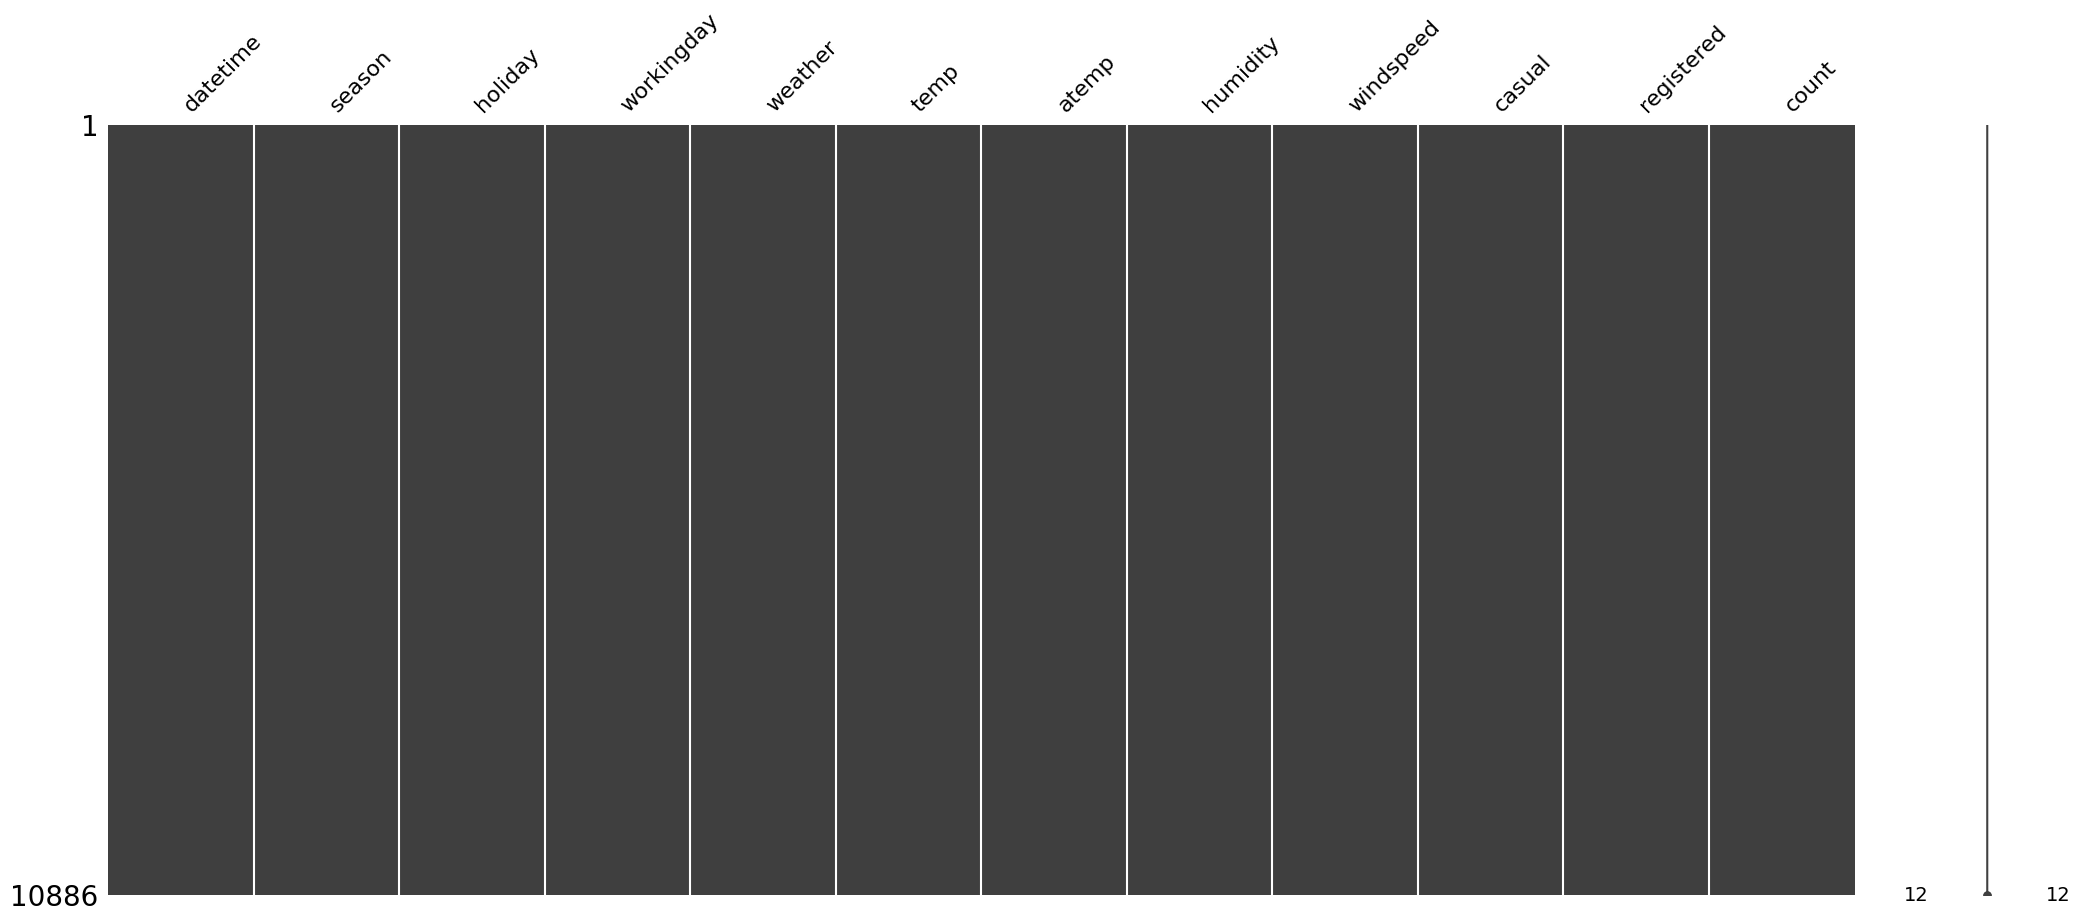

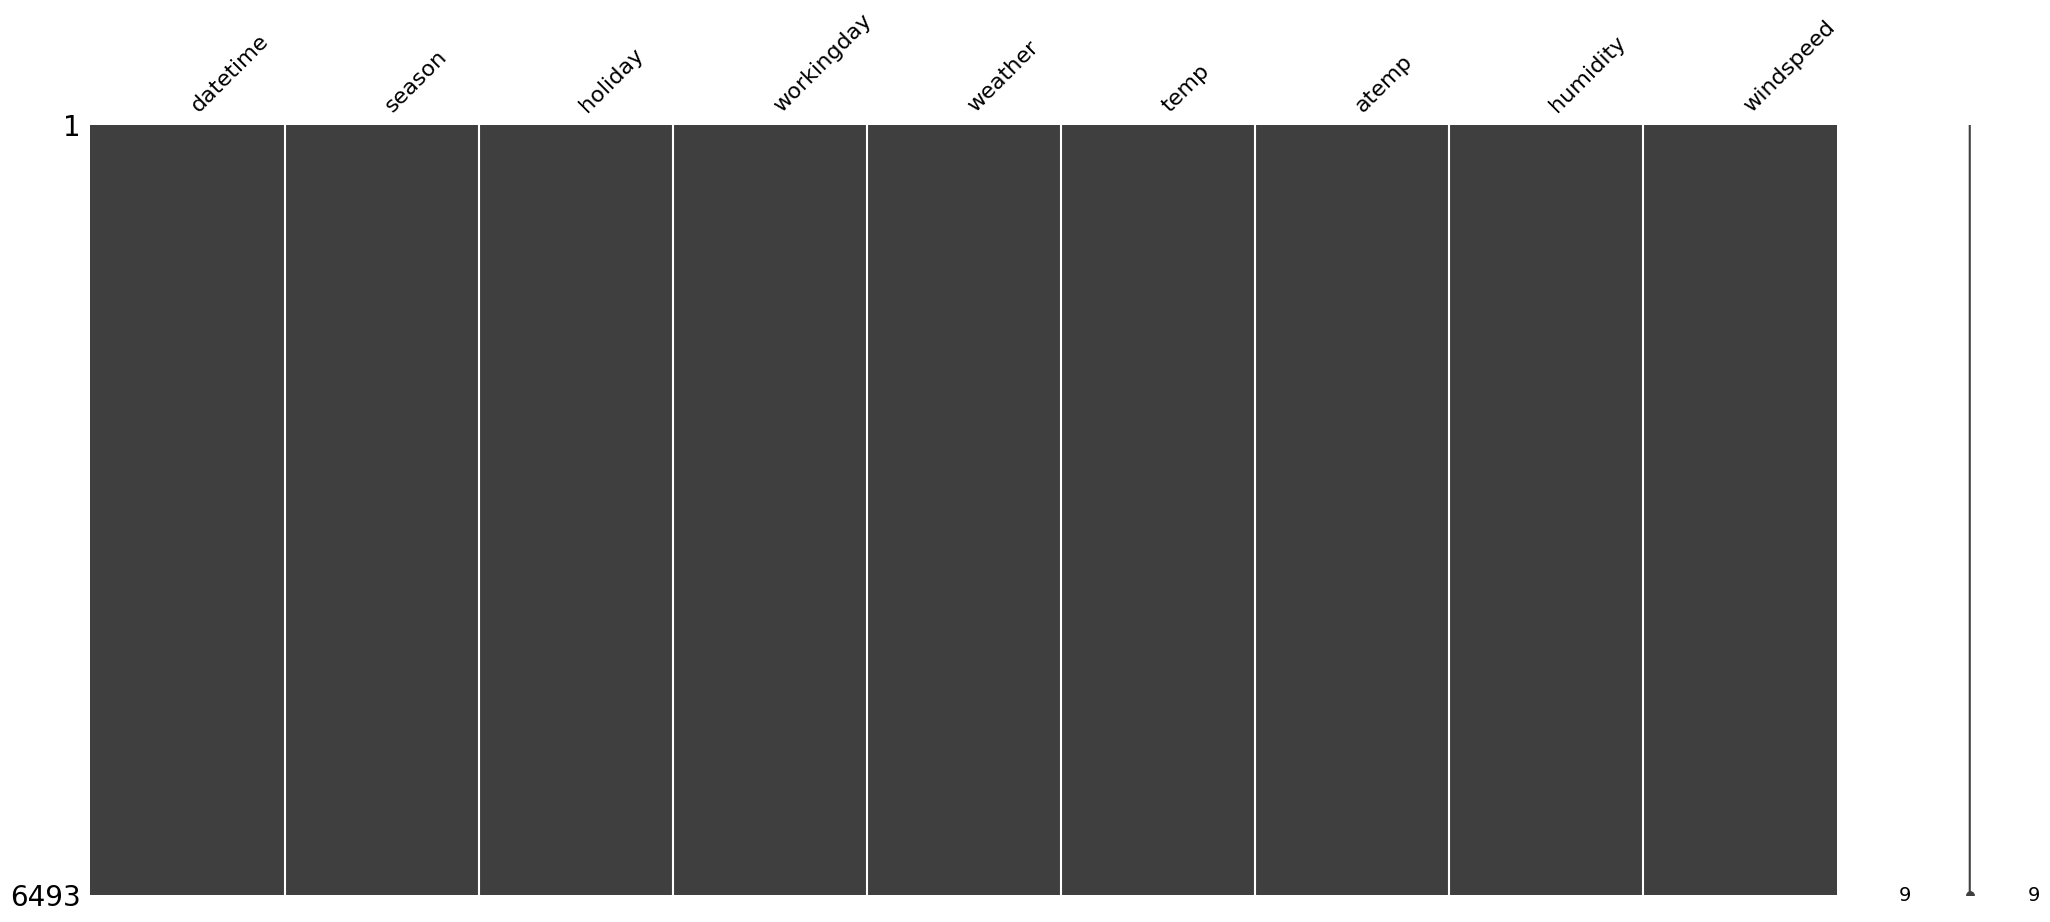

In [ ]:
#Check for missing Values: 
msno.matrix(train)
msno.matrix(test)

In [ ]:
# Drop non essential col
train.drop(columns=['casual','registered'],inplace=True)

# datetime
print(train['datetime'][100]) 
print(train['datetime'][100].split()) 
print(train['datetime'][100].split()[0]) 
print(train['datetime'][100].split()[1]) 

# Split the date string again into year, month, and day
print(train['datetime'][100].split()[0]) 
print(train['datetime'][100].split()[0].split("-"))
print(train['datetime'][100].split()[0].split("-")[0]) 
print(train['datetime'][100].split()[0].split("-")[1]) 
print(train['datetime'][100].split()[0].split("-")[2]) 

train['date'] = train['datetime'].apply(lambda x: x.split()[0]) 
train['date']

train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])

print(train['date'][100]) 
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) 


# Day of the Week int
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())

# Day of the Week string
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])


train['weekday'] = train['date'].apply(lambda dataString: 
                                      calendar.day_name[datetime.strptime(dataString, 
                                                                          "%Y-%m-%d").weekday()])
train.head()

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00
2011-01-05
['2011', '01', '05']
2011
01
05
2011-01-05
2011-01-05 00:00:00
2
Wednesday


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [ ]:
# Mapping Weather information
train['season'] = train['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
train['weather'] = train['weather'].map({1:'Clear', 2:'Mist, Few Clouds', 3:'Light Snow, Rain, Thunderstorm', 4:'Heavy Rain, Thunderstrom, Snow, Fog'})
train.drop(columns=['date'],inplace=True)
display(train.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,16,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,40,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,32,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,13,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,1,2011,01,01,04,00,00,Saturday


## Checking Data Distribution 

*   Normality Assumation Check for Regression



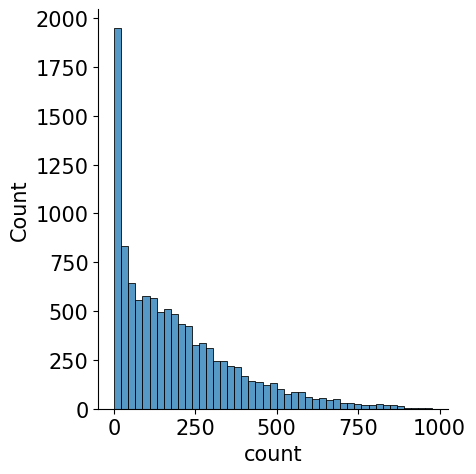

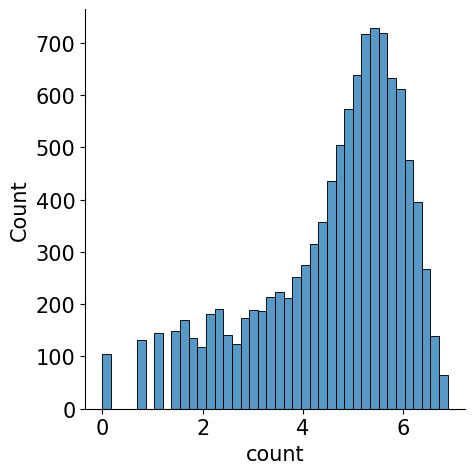

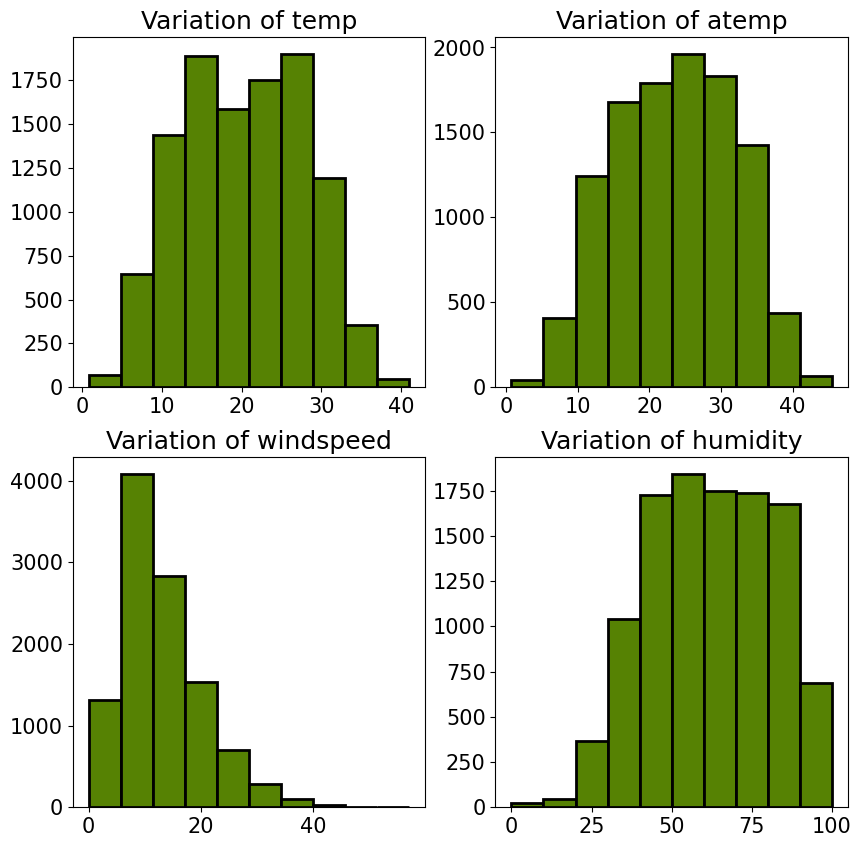

In [ ]:
# Check the distribution of the Data
mpl.rc('font', size = 15)
sns.displot(train['count'])
# Log Data 
sns.displot(np.log(train['count']))

# can also be visulaized using histograms for all the continuous variables.
train.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train,edgecolor="black",linewidth=2,color='#568203')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=train,edgecolor="black",linewidth=2,color='#568203')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=train,edgecolor="black",linewidth=2,color='#568203')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=train,edgecolor="black",linewidth=2,color='#568203')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

Counts are clustered at 0 (Right Skewd). For us to perfrom regression model to perform well, the data must follow a normal distribution. Therefore, we will apply a log transformation

## Exploratory Data Analysis Visualization

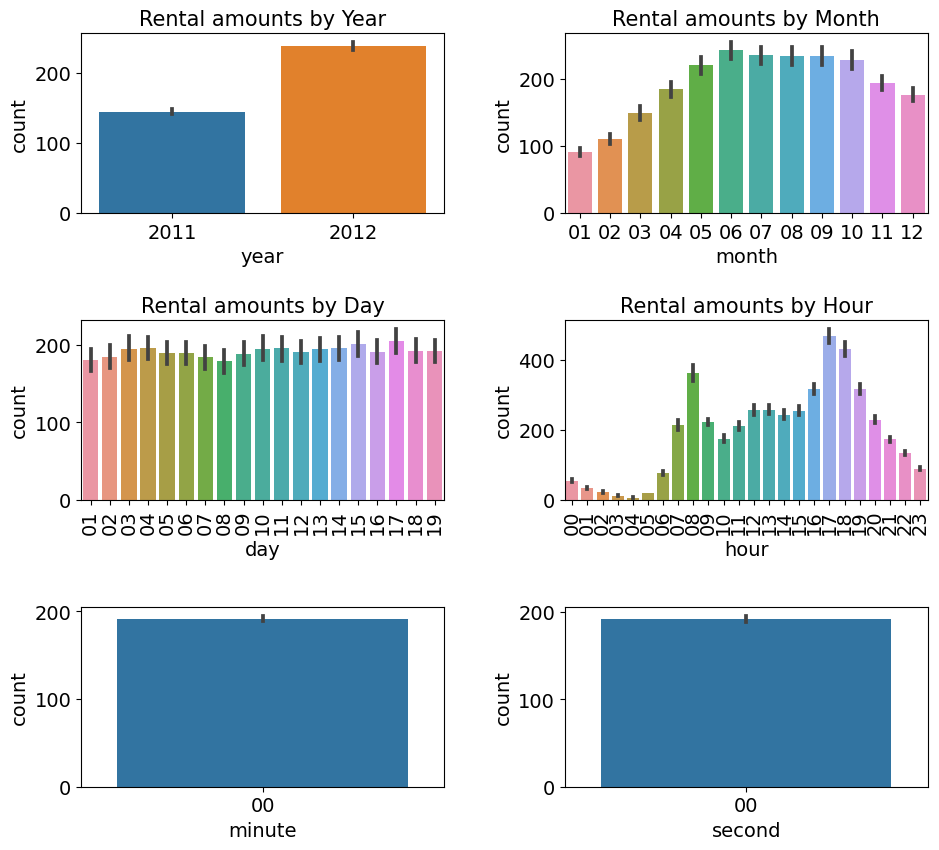

In [ ]:
# EDA-Visualization
mpl.rc('font', size = 14) 
mpl.rc('axes', titlesize = 15) 
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10, 9)

sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(data=train, x='minute', y='count', ax=axes[2,0])
sns.barplot(data=train, x='second', y='count', ax=axes[2,1])

axes[0, 0].set(title='Rental amounts by Year')
axes[0, 1].set(title='Rental amounts by Month')
axes[1, 0].set(title='Rental amounts by Day')
axes[1, 1].set(title='Rental amounts by Hour')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)


### Observations from Plots of Rental amount on Year, Month, Day, Hour, Minute, Second
1. The monthly rental volume is the highest in June and the lowest in January. As the weather gets warmer, the number of rentals increase which makes sense.
2. There is no significant or slightly lower demand for rental per weekday. And since the train data has only days 1 to 19 and the test data has days 20 to the end of the month, day data cannot be used. The day feature will be removed.
3. Looking at the amount of rental by hour, there are many rentals at 8a.m and between 5-6pm that year.
4. More rentals in 2012 than in 2011
5. The amount of rental per minute and per second is of no use. So we decided to remove the feature.


In [ ]:
#Drop Col
train.drop(columns=['day', 'minute', 'second'], inplace=True)
train.head()

## Boxplots for Season, Weather and Workday Visualization

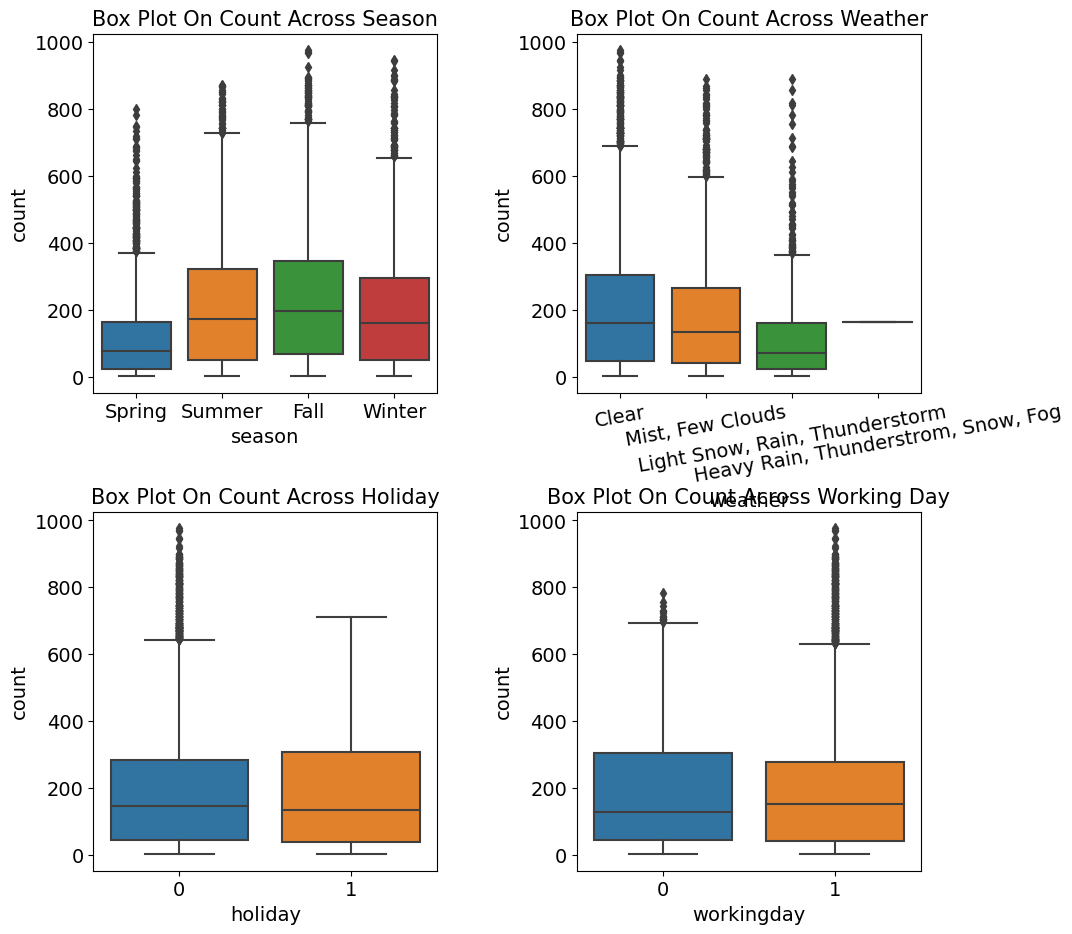

In [ ]:
# Season , Weather and Workday Visualization
figure, axes = plt.subplots(nrows=2, ncols=2) 
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

axes[0, 1].tick_params('x', labelrotation=10)

### Observations from Boxplots

1. Count of rentals by weather, shows better weather results in more rentals.
2. Count of rentals by season, are the lowest in spring and the highest in autumn.
3. Looking at the number of rentals by holiday, the median values of non-holiday (0) and public holiday (1) are almost similar. But there are many outliers when it is not a holiday

## Visualization of Average Rental Quantity by Working Days, Holidays, Days of the Week, Seasons, and Weather

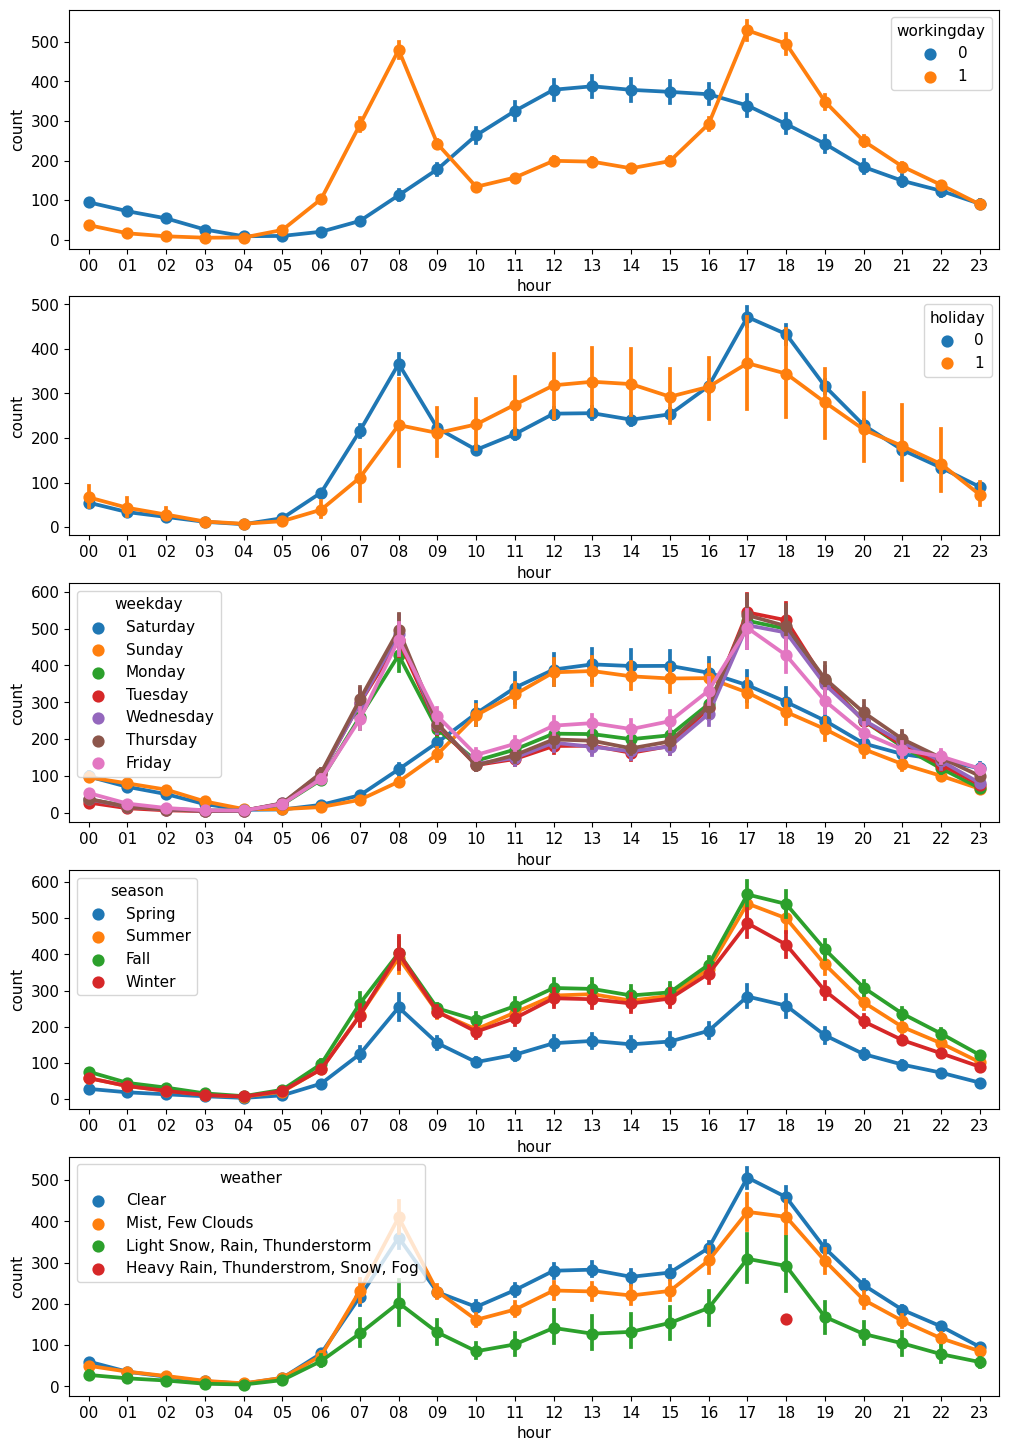

In [ ]:
# Average rental quantity by working days, holidays, days of the week, seasons, and weather
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

### Observations on Average Rental Quantity 

1.  The rental volume on holiday's (keeping into account day of the week) is also similar to that of the working day.
2. Seasonal rental volume is in the order of fall-summer-winter-spring
3. The better the weather, the more rentals, and almost no rentals during heavy rain or heavy snow. There is an outlier around 18:00 and it would be better to remove this outlier
4. On working days, rental demand coincides with rush hour (7-8am), (5-6pm)
5. On non-working days (holidays and weekends), rental demand starts increasing at 10:00 a.m. and reaminsshigh until around 6p.m. 12:2 PM being peak times


## Visualization of Average Rental Quantity by Temperature, Perceived Temperature, Wind Speed, and Humidity

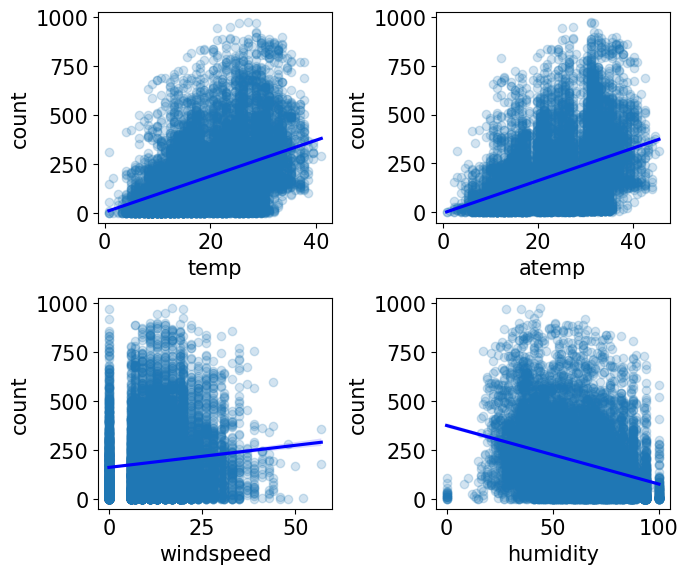

In [ ]:
# Scatter plot of rental quantity by temperature, perceived temperature, wind speed, and humidity
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

### Observations: The slope of the regression line gives you an indication of the trend

1. Wind speed is often zero. It is more likely that the actual wind speed was recorded as zero due to no observations error rather than it being zero. We can either delete the windspeed feature or fill in the values recorded with zeros.
2. The higher the temperature and perceived temperature, the higher the rental amount.
3. The lower the humidity, the higher the rent


### Correlation between Features in the DataFrame

In [ ]:
# correlation coefficient between features in the DataFrame
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


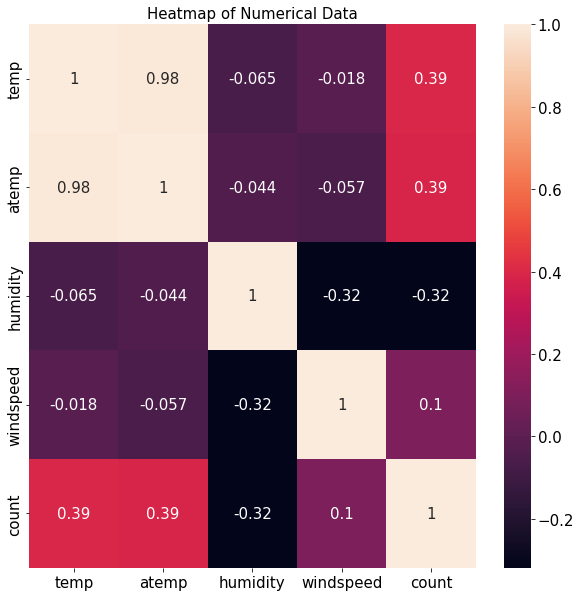

In [ ]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # Plotting a correlation heatmap
ax.set(title='Heatmap of Numerical Data');

## Multiple Linear Regression model to check significant variables

In [ ]:
import statsmodels.api as sm

In [ ]:
mlr_bike_train=pd.read_csv("https://raw.githubusercontent.com/faraz999/data607/main/train.csv")
mlr_bike_test= pd.read_csv("https://raw.githubusercontent.com/faraz999/data607/main/test.csv")

In [ ]:
mlr_y_train = bike_train['count']
# Fit the multiple linear regression model
mlr_X_train = mlr_bike_train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
mlr_X_train = sm.add_constant(mlr_X_train) # Add a constant term for the intercept
model = sm.OLS(mlr_y_train, mlr_X_train).fit()

In [ ]:
# Print the summary of the model
print(model.summary())

# Check the p-value for the 'weather' coefficient
print('p-value for weather:', model.pvalues['weather'])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     480.0
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:56:16   Log-Likelihood:                -70400.
No. Observations:               10886   AIC:                         1.408e+05
Df Residuals:                   10877   BIC:                         1.409e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.7905      8.710     15.590      0.0

## Hypothesis testing

*   Ho: weather is a significant variable for the prediction of bike share demand. 
*   Ha: Weather is not significant predictor for bike share demand. 

With a P-value of  0.023 < 0.05. We reject the null hypothesis, that weather is a significant predictor. Furthermore from checking the p-values of other variables, we see that workingday, holiday and temp are significant predictors of bike share demand.

## Model Check

#### Dummify Season and Weather on both Training and Test Data

In [ ]:
# Read Data again
train_url = "https://raw.githubusercontent.com/faraz999/data607/main/train.csv"
test_url = "https://raw.githubusercontent.com/faraz999/data607/main/test.csv"
train= pd.read_csv(train_url)
test= pd.read_csv(test_url)

# Enhance Feautres :
# Season
season=pd.get_dummies(train['season'],prefix='season')
train=pd.concat([train,season],axis=1)
#display(train.head())
season=pd.get_dummies(test['season'],prefix='season')
test=pd.concat([test,season],axis=1)
#display(test.head())

#Weather
weather=pd.get_dummies(train['weather'],prefix='weather')
train=pd.concat([train,weather],axis=1)
#display(train.head())
weather=pd.get_dummies(test['weather'],prefix='weather')
test=pd.concat([test,weather],axis=1)
#display(train.head())

# now can drop weather and season. due to convertion of categorical variable into numerical dimentions were added by python library which are not necessary. Thus removing the non-significent multidimentional columns. 
train.drop(['season','weather'],inplace=True,axis=1)
display(train.head())
test.drop(['season','weather'],inplace=True,axis=1)
display(test.head())

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [ ]:
#Date time 

train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})
display(train.head())

test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})
display(test.head())

#Drop Col.
train.drop('datetime',axis=1,inplace=True)
train.drop(['casual','registered'],axis=1,inplace=True)
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,1,0,0,0,4,5,1,0


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


In [ ]:
print(train.columns.to_series().groupby(train.dtypes).groups)
x_train,x_test,y_train,y_test=train_test_split(train.drop('count',axis=1),train['count'],test_size=0.25,random_state=42)

{uint8: ['season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'], int64: ['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month', 'year'], float64: ['temp', 'atemp', 'windspeed']}


## Implemention of Regression Models (RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, KNeighborsRegressor)

,Model Type,RMSLE
0,RandomForestRegressor,0.321475
1,AdaBoostRegressor,1.025075
2,BaggingRegressor,0.336069
3,KNeighborsRegressor,0.860416


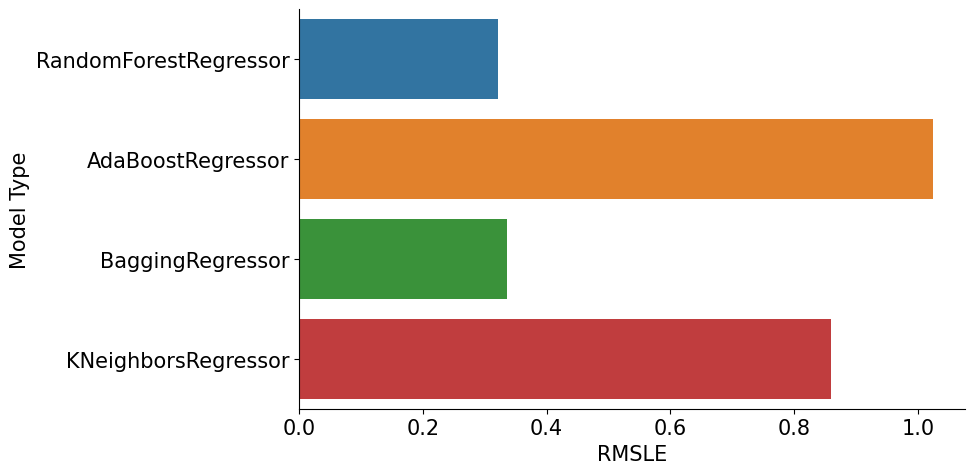

In [ ]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
rmsle=[]
m1={}
for model in range (len(models)):
    c1=models[model]
    c1.fit(x_train,y_train)
    test_pred=c1.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
m1={'Model Type':model_names,'RMSLE':rmsle}   
m1

rmsle_frame=pd.DataFrame(m1)
display(rmsle_frame)

sns.catplot(y='Model Type',x='RMSLE',data=rmsle_frame,kind='bar',height=5,aspect=2)

## Random Forest Regression

In [ ]:
# Random forest regression.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
c2=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
c2.fit(x_train,y_train)
pred=c2.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

0.32034620134099634


In [ ]:
c2.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

# KNN

In [ ]:
# KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
knn1=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
knn1.fit(x_train,y_train)
pred=knn1.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))
knn1.best_params_

0.8604162870191422


{'n_jobs': -1, 'n_neighbors': 5}

So far Random forest Reg seems like the best - 0.319374518897447

## RMSE Analysis

In [ ]:
# read the train and test data
train_url = "https://raw.githubusercontent.com/faraz999/data607/main/train.csv"
test_url = "https://raw.githubusercontent.com/faraz999/data607/main/test.csv"
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# combine train and test data into one dataframe
df = pd.concat([train_df, test_df], ignore_index=True)

# create dummy variables for season and weather columns
season = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season], axis=1)
weather = pd.get_dummies(df['weather'], prefix='weather')
df = pd.concat([df, weather], axis=1)

# create new columns for hour, day, month, and year
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})

# create interaction terms
df['temp_humidity'] = df['temp'] * df['humidity']
df['temp_wind'] = df['temp'] * df['windspeed']

# add polynomial features
df['temp^2'] = df['temp'] ** 2
df['temp^3'] = df['temp'] ** 3
df['temp^4'] = df['temp'] ** 4
df['humidity^2'] = df['humidity'] ** 2
df['windspeed^2'] = df['windspeed'] ** 2

# drop unnecessary columns
df.drop(['datetime', 'season', 'weather', 'casual', 'registered'], inplace=True, axis=1)

# split the data back into train and test sets
train_df = df.iloc[:len(train_df)]
test_df = df.iloc[len(train_df):]

# define the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(max_iter=10000),
    'RidgeCV': RidgeCV(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Bagging': BaggingRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'SVR': SVR(max_iter=10000),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor()
}

# split the data into features and target
X = train_df.drop('count', axis=1)
y = train_df['count']

# split the data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# define a function to evaluate each model and return the RMSE
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse
      
# evaluate each model and print the RMSE
for name, model in models.items():
    rmse = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name}: {rmse:.2f}")

Linear Regression: 137.20
Lasso: 137.14
RidgeCV: 137.25
Random Forest: 39.55
Bagging: 42.35
Gradient Boosting: 68.78
AdaBoost: 102.23
SVR: 172.27
KNN: 160.63
XGBoost: 39.29


## RMSLE test

In [ ]:
# RMSLE test

# read the train and test data
train_url = "https://raw.githubusercontent.com/faraz999/data607/main/train.csv"
test_url = "https://raw.githubusercontent.com/faraz999/data607/main/test.csv"
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# combine train and test data into one dataframe
df = pd.concat([train_df, test_df], ignore_index=True)

# create dummy variables for season and weather columns
season = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season], axis=1)
weather = pd.get_dummies(df['weather'], prefix='weather')
df = pd.concat([df, weather], axis=1)

# create new columns for hour, day, month, and year
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})

# create interaction terms
df['temp_humidity'] = df['temp'] * df['humidity']
df['temp_wind'] = df['temp'] * df['windspeed']

# add polynomial features
df['temp^2'] = df['temp'] ** 2
df['temp^3'] = df['temp'] ** 3
df['temp^4'] = df['temp'] ** 4
df['humidity^2'] = df['humidity'] ** 2
df['windspeed^2'] = df['windspeed'] ** 2

# drop unnecessary columns
df.drop(['datetime', 'season', 'weather', 'casual', 'registered'], inplace=True, axis=1)

# split the data back into train and test sets
train_df = df.iloc[:len(train_df)]
test_df = df.iloc[len(train_df):]

# define the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(max_iter=10000),
    'RidgeCV': RidgeCV(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Bagging': BaggingRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'SVR': SVR(max_iter=10000),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor()
}

# split the data into features and target
X = train_df.drop('count', axis=1)
y = train_df['count']

# split the data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import mean_squared_error, mean_squared_log_error

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # apply log transformation to target variable
    y_train_log = np.log1p(y_train)
    model.fit(X_train, y_train_log)
    
    # make predictions and apply inverse transformation
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    
    # calculate RMSE and RMSLE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_test, np.maximum(y_pred, 0)))
    
    return rmse, rmsle

# evaluate each model and print the RMSE and RMSLE
for name, model in models.items():
    rmse, rmsle = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name}: RMSE = {rmse:.3f}, RMSLE = {rmsle:.3f}")

Linear Regression: RMSE = 158.162, RMSLE = 1.011
Lasso: RMSE = 161.627, RMSLE = 1.064
RidgeCV: RMSE = 158.364, RMSLE = 1.011
Random Forest: RMSE = 40.093, RMSLE = 0.309
Bagging: RMSE = 43.231, RMSLE = 0.327
Gradient Boosting: RMSE = 77.754, RMSLE = 0.413
AdaBoost: RMSE = 142.190, RMSLE = 0.664
SVR: RMSE = 167.905, RMSLE = 1.335
KNN: RMSE = 167.027, RMSLE = 1.245
XGBoost: RMSE = 43.248, RMSLE = 0.302


## Plotting RMSE and RMSLE values of all Models

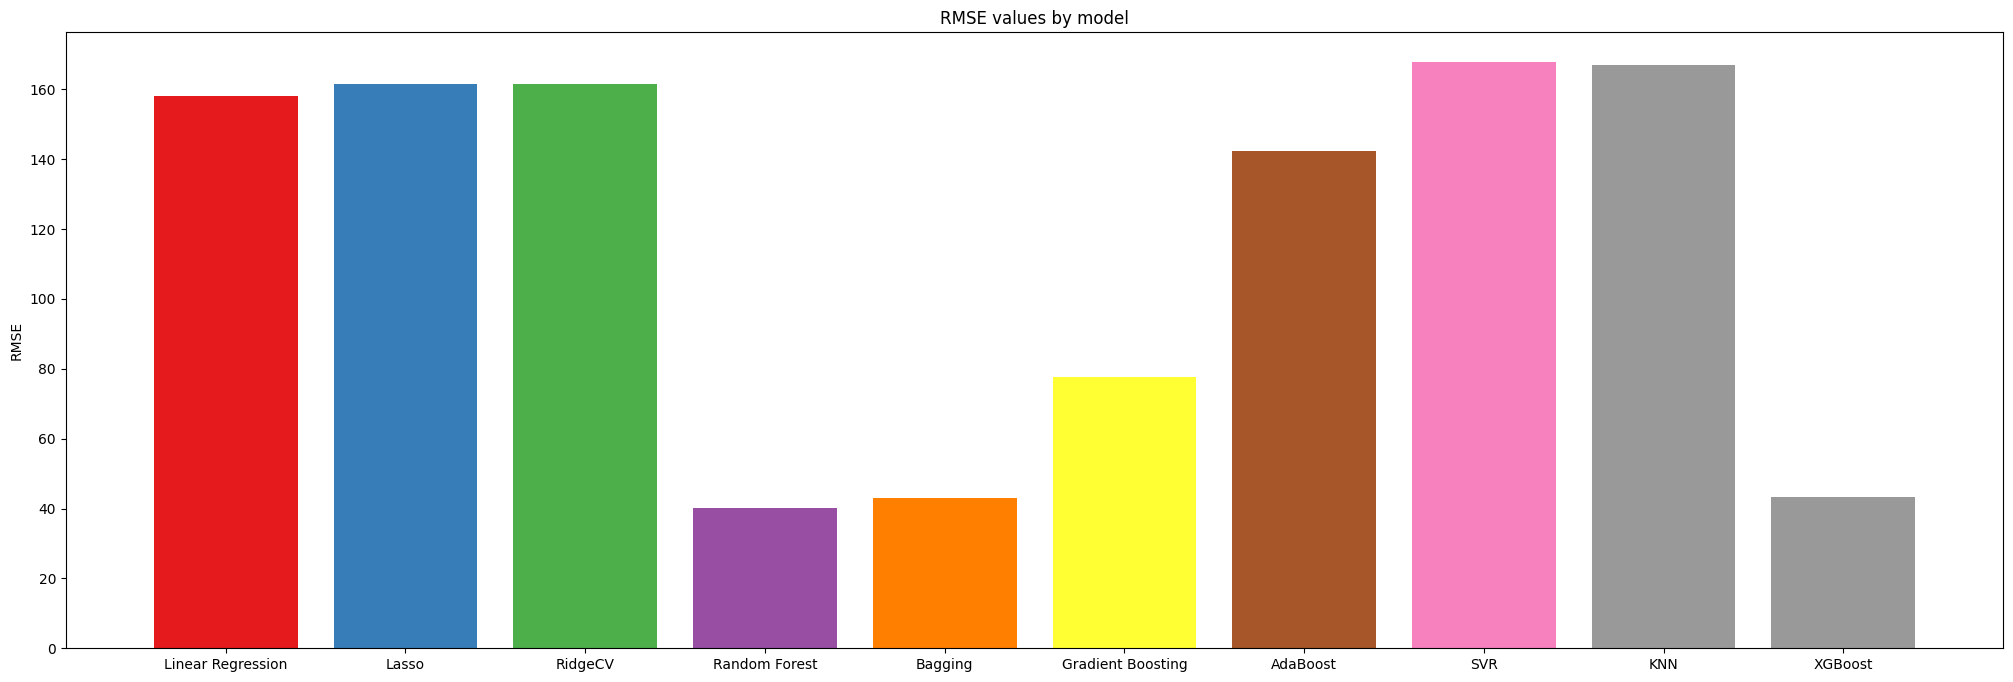

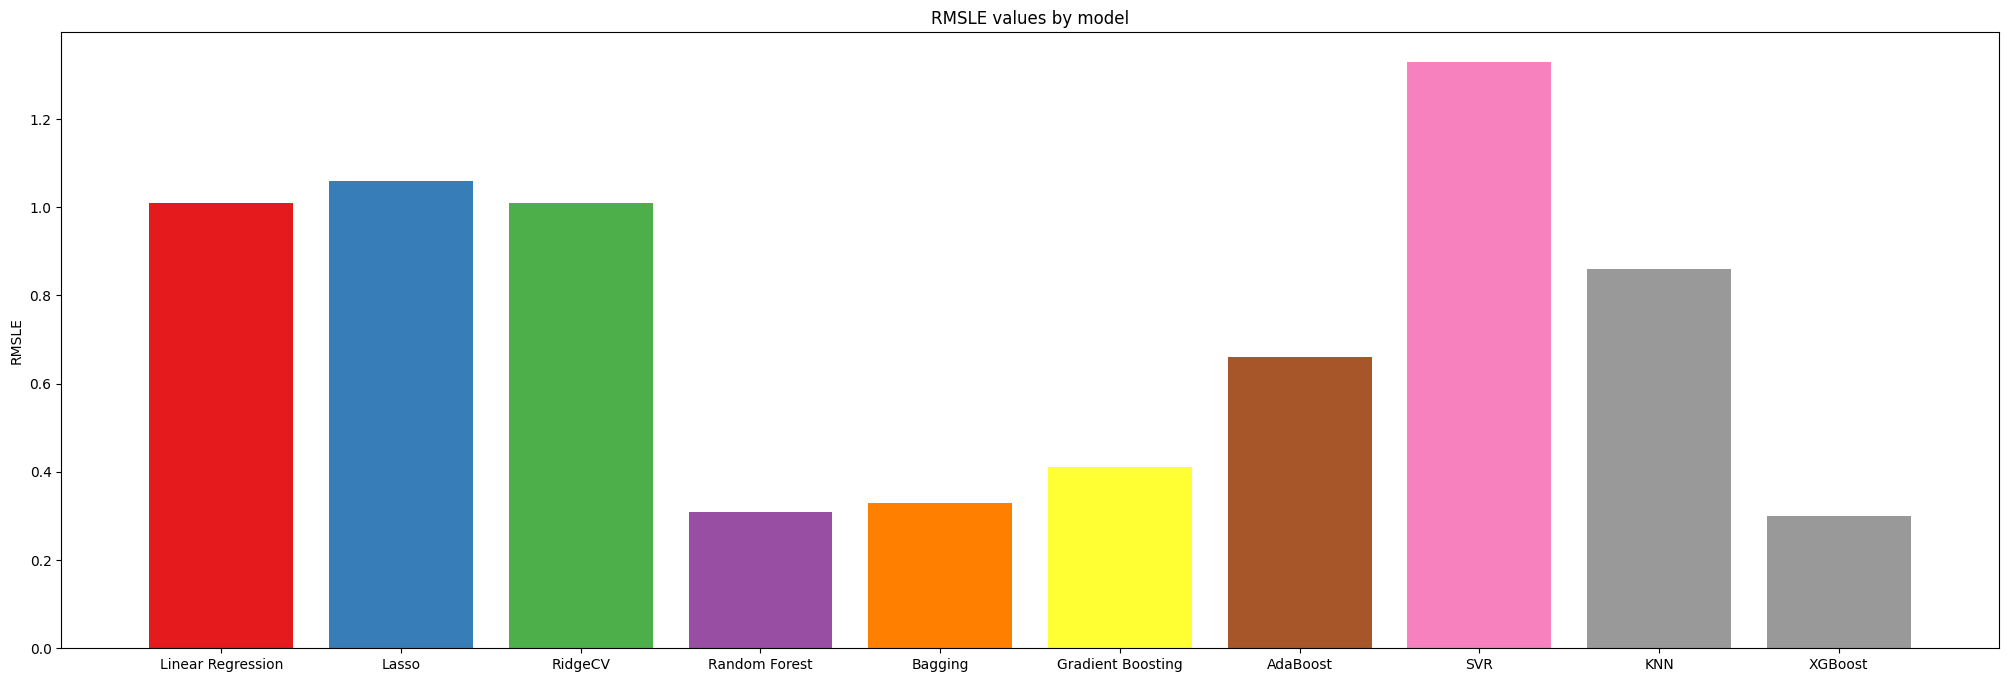

In [ ]:
# set up the data
names = list(models.keys())
rmse_values = [158.16, 161.63, 161.45, 40.25, 43.00, 77.75, 142.19, 167.91, 167.06, 43.25]
rmsle_values = [1.01, 1.06, 1.01, 0.31, 0.33, 0.41, 0.66, 1.33, 0.86, 0.30]

# set up the color palette
palette = plt.get_cmap('Set1')

# create the figure and axes
fig, ax = plt.subplots(figsize=(25, 8))

# create the bar plots
ax.bar(names, rmse_values, color=palette(np.arange(len(names))))
ax.set_ylabel('RMSE')
ax.set_title('RMSE values by model')
plt.show()

# create the figure and axes
fig, ax = plt.subplots(figsize=(25, 8))

# create the bar plots
ax.bar(names, rmsle_values, color=palette(np.arange(len(names))))
ax.set_ylabel('RMSLE')
ax.set_title('RMSLE values by model')
plt.show()

### Observations from the plots

1. Linear Regression, Lasso, and RidgeCV all have similar RMSE values but slightly different RMSLE values. It's worth noting that the RMSLE values for these models are higher than those for the tree-based models, which is likely due to the fact that they are more sensitive to outliers.

2. Random Forest and Bagging both have low RMSE and RMSLE values, indicating that they are performing well on this dataset. Random Forest is particularly impressive, with an RMSLE value of only 0.31.

3. Gradient Boosting and AdaBoost have higher RMSLE values than Random Forest and Bagging, but still significantly lower than the linear models.

4. SVR and KNN have similar RMSE values and high RMSLE values, indicating that they are not performing as well as the other models on this dataset.

5. XGBoost has a low RMSE value and the lowest RMSLE value of all the models, indicating that it is the best-performing model on this dataset.

# Discussion
After completing our exploratory analysis we were able to identify trends within the dataset. Rental volume peaked in the month of June, which it was lowest in January. Warmer weather seemed to be an indicator of rental demand. This was supported by temperature being a significant predictor for rental demand, checked via multiple linear regression. This trend isn’t surprising as warmer weather tends to attract people to outdoor activities. Peak rental times throughout weekdays seemed to coincide with what is typically associated with rush hour times, 7:00am-8:00am and 5:00pm-6:00pm. 

When looking at weather conditions, more favorable outdoor weather increased rental count. When checked for being a significant predictor, weather was shown not to be a significant predictor. It would be interesting in future work to check multifarious elements of weather conditions, for example higher daily temperatures and unfavorable weather conditions. Also a more detailed dataset may allow a more detailed time series for bike rentals which may show rental demand before, during and after unfavorable weather conditions to check if this changes significance or if it is solely tied to temperature. 

When checking if Holidays were a significant predictor for rental demand, it was shown through the exploratory analysis and multiple linear regression to be significant. Work days were also a significant predictor, typically you’d expect to see a higher peak demand on a workday then on a weekend or holiday. Weekends saw demand remain relatively steady throughout the day from around 9:00am to 7:00 pm. Seasonal changes in bike rental demand were seen with spring having the lowest demand and fall having the highest. When looking at traits which were seen to be negatively correlated with demand, humidity was deemed to be negatively correlated with rental count. This could be related to the trend we saw with unfavorable weather conditions like precipitation causing an increase in humidity level, more in depth analysis would need to be done with a more detailed dataset, ideally a time series dataset overlaid with weather throughout each day. 

When assessing models for which worked best, we saw that tree based models had the best result for predicting rental demand. The two best models we assessed were Random Forest and XGBoost. Random forest had a RMSE of 40.093 and RMSLE of 0.309, while XGBoost had an RMSE of 43.248 and RMSLE of 0.302, overall XGBoost was the best model for predicting rental demand as it was the best preforming RMSLE value. 


# Conclusion
Through exploratory analysis and multiple linear regression, we determined following

1) Holidays, working days and temperature to be the only significant predictors for the dataset. 

2) Weekdays around rush hour were the highest average peak rental times at 7:00-am - 8:00am and 5:00pm- 6:00pm. 

3)Weekends saw steady demand in rentals from 10:00am -6:00pm. 

4)Lowest rental counts throughout the year were in spring, while the highest were fall. 

Finally when looking at the best performing model from our methodology we determined that XGBoost was the best performing model for prediction of rental demand.

Other tree based such as Random Forest and Bagging also worked well in prediction of rental demand.

# References



*  Bike Sharing Demand dataset. Retrieved from Kaggle at this link https://www.kaggle.com/c/bike-sharing-demand on 18th March 2023.​

*  UCI machine learning repository Bike Sharing Dataset. Retrieved from http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset on 18th March 2023.


